In [1]:
import os
from pathlib import Path
import matplotlib.pyplot as plt
from pydub import AudioSegment
from pydub.silence import split_on_silence
from pydub.utils import make_chunks

In [ ]:
voice1 = AudioSegment.from_file("audios_raw/mohammadali_1.ogg")
voice2 = AudioSegment.from_file("audios_raw/mohammadali_2.ogg")

combined_voice = voice1 + voice2
combined_voice.export("audios_raw/mohammadali.ogg", format="ogg", bitrate="192k")

os.remove("audios_raw/mohammadali_1.ogg")
os.remove("audios_raw/mohammadali_2.ogg")

In [3]:
voice1 = AudioSegment.from_file("audios_raw/morteza_1.m4a")
voice2 = AudioSegment.from_file("audios_raw/morteza_2.m4a")

combined_voice = voice1 + voice2
combined_voice.export("audios_raw/morteza.ogg", format="ogg", bitrate="192k")

os.remove("audios_raw/morteza_1.m4a")
os.remove("audios_raw/morteza_2.m4a")

In [4]:
voice1 = AudioSegment.from_file("audios_raw/zeynab_1.ogg")
voice2 = AudioSegment.from_file("audios_raw/zeynab_2.ogg")

combined_voice = voice1 + voice2
combined_voice.export("audios_raw/zeynab.ogg", format="ogg", bitrate="192k")

os.remove("audios_raw/zeynab_1.ogg")
os.remove("audios_raw/zeynab_2.ogg")

In [5]:
sound = AudioSegment.from_ogg("audios_raw/sajjad.ogg")
audio_chunks = split_on_silence(sound, min_silence_len=2000, silence_thresh=-45)
audio_chunks

In [6]:
combined_audio = sum(audio_chunks)
combined_audio

benyamin.ogg


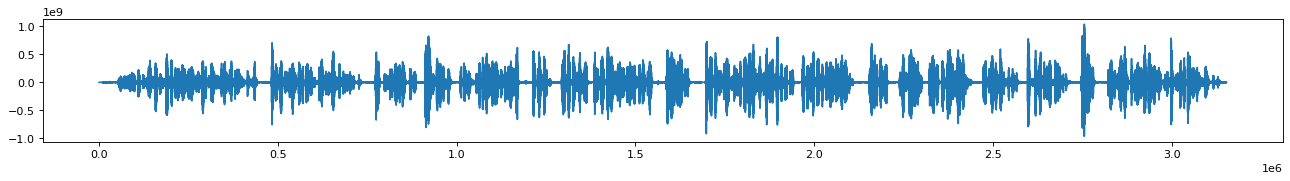

mohammadali.ogg


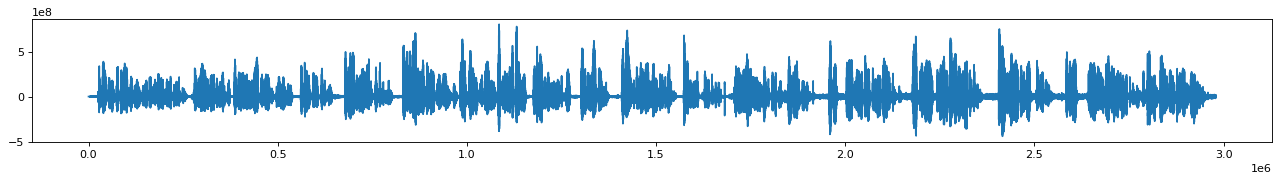

nahid.ogg


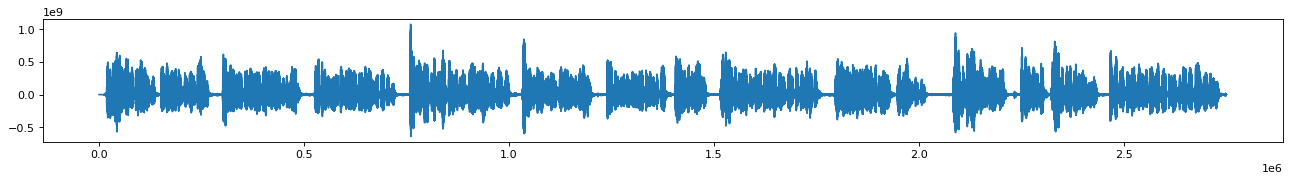

maryam.ogg


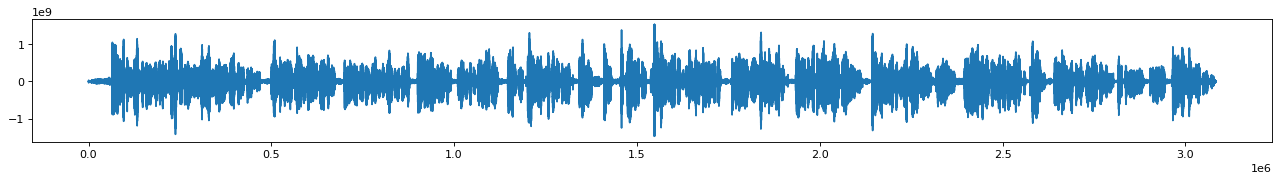

sajjad.ogg


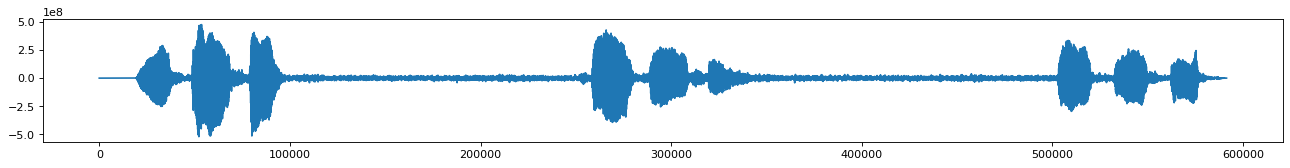

zahra.opus


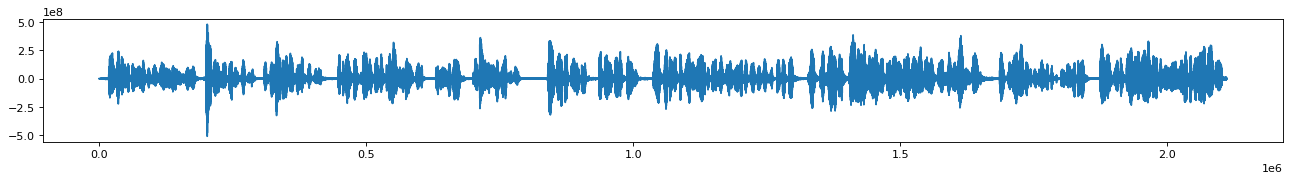

parisa.ogg


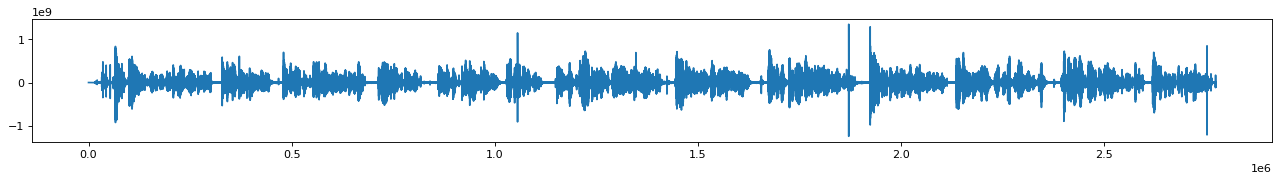

alireza.ogg


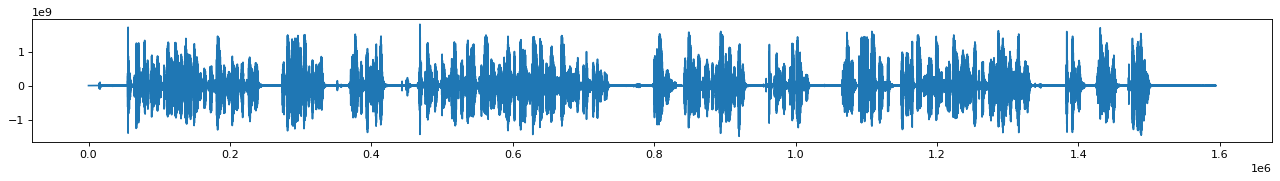

zeynab.ogg


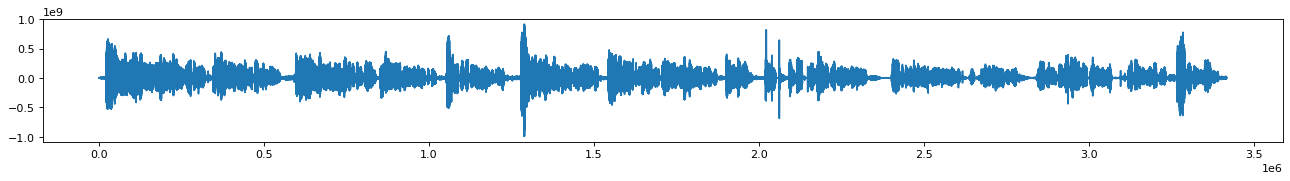

morteza.ogg


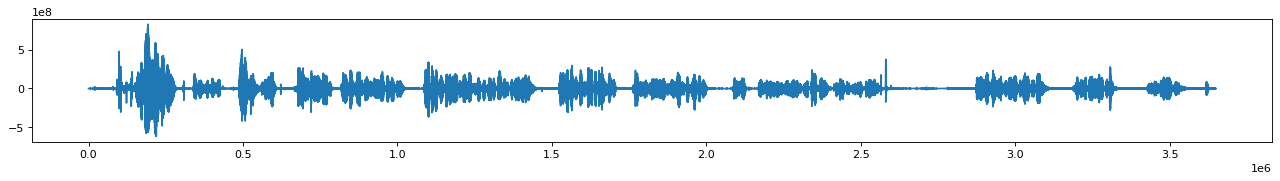

In [46]:
audios_raw_dir_path = "audios_raw"
audios_remove_silence_dir_path = "audios_remove_silence"
Path(audios_remove_silence_dir_path).mkdir(exist_ok=True)

for file in os.listdir(audios_raw_dir_path):
    file_path = os.path.join(audios_raw_dir_path, file)
    audio = AudioSegment.from_file(file_path)
    
    # draw
    print(file)
    samples = audio.get_array_of_samples()
    plt.figure(figsize=(20, 2), dpi=80)
    plt.plot(samples)
    plt.show()
    
    # Convert to 16-bit PCM
    audio = audio.set_sample_width(2)
    audio = audio.set_frame_rate(48000)
    audio = audio.set_channels(1)
    
    # remove silence
    audio_chunks = split_on_silence(audio, min_silence_len=2000, silence_thresh=-45)
    combined_audio = sum(audio_chunks)
    filename = Path(file_path).stem
    output_file_path = os.path.join(audios_remove_silence_dir_path, filename + ".wav")
    combined_audio.export(output_file_path, format="wav")

In [50]:
audios_remove_silence_dir_path = "audios_remove_silence"
dataset_dir_path = "dataset"
Path(dataset_dir_path).mkdir(exist_ok=True)

for file in os.listdir(audios_remove_silence_dir_path):
    filename = Path(file).stem
    file_path = os.path.join(audios_remove_silence_dir_path, file)
    Path(os.path.join(dataset_dir_path, filename)).mkdir(parents=True, exist_ok=True)

    audio = AudioSegment.from_file(file_path)
    chunk_length_ms = 1000  # pydub calculates in millisec 
    chunks = make_chunks(audio, chunk_length_ms)  #  Make chunks of one sec 
    
    for i, chunk in enumerate(chunks):
        if len(chunk) < 1000:
            continue
        output_file_path = os.path.join(dataset_dir_path, filename, filename + "_" + str(i) + ".wav")
        print ("exporting", output_file_path)
        chunk.export(output_file_path, format="wav")

exporting dataset/mohammadali/mohammadali_0.wav
exporting dataset/mohammadali/mohammadali_1.wav
exporting dataset/mohammadali/mohammadali_2.wav
exporting dataset/mohammadali/mohammadali_3.wav
exporting dataset/mohammadali/mohammadali_4.wav
exporting dataset/mohammadali/mohammadali_5.wav
exporting dataset/mohammadali/mohammadali_6.wav
exporting dataset/mohammadali/mohammadali_7.wav
exporting dataset/mohammadali/mohammadali_8.wav
exporting dataset/mohammadali/mohammadali_9.wav
exporting dataset/mohammadali/mohammadali_10.wav
exporting dataset/mohammadali/mohammadali_11.wav
exporting dataset/mohammadali/mohammadali_12.wav
exporting dataset/mohammadali/mohammadali_13.wav
exporting dataset/mohammadali/mohammadali_14.wav
exporting dataset/mohammadali/mohammadali_15.wav
exporting dataset/mohammadali/mohammadali_16.wav
exporting dataset/mohammadali/mohammadali_17.wav
exporting dataset/mohammadali/mohammadali_18.wav
exporting dataset/mohammadali/mohammadali_19.wav
exporting dataset/mohammadali/

In [48]:
voice = AudioSegment.from_file("dataset/morteza/morteza_0.wav")
samples = voice.get_array_of_samples()
len(samples)

48000

In [49]:
# change sampling rate
voice = voice.set_frame_rate(48000)
voice = voice.set_channels(1)
samples = voice.get_array_of_samples()
len(samples)

48000

In [35]:
voice = AudioSegment.from_file("dataset/benyamin/benyamin_3.wav")
samples = voice.get_array_of_samples()
len(samples)

48000

In [6]:
voice = AudioSegment.from_file("dataset_test/a/alireza_30 copy.wav")
samples = voice.get_array_of_samples()
len(samples)

48000